# Setup the environment

In [1]:
import pandas as pd
import numpy as np
import pandas.api.types as ptypes
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', None)

# ETL Process

## Data Extraction

In [2]:
# Load CSV file into a dataframe
working_dir = "E:/backup17092018/Myappdir/Myprojects/Data Science/Portfolio Projects/160 Margin Analysis/"
file_name = 'margin_analysis_data.csv'

df = pd.read_csv(working_dir + file_name, header=0, delimiter=',')
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Postal Code,City,State,Country,Region,Market,Product ID,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Customer Name,Segment,Returned,Person,Priority ID,Product Name,Category,Sub-Category
0,24599,IN-2017-CA120551-42816,2023-03-22 00:00:00.000,2023-03-29 00:00:00.000,Standard Class,CA-120551,NaN,Herat,Hirat,Afghanistan,Southern Asia,Asia Pacific,FUR-BO-4861,"731,82",2,0,"102,42","39,66",Medium,Cathy Armstrong,Home Office,Yes,Chandrakant Chaudhri,4,"Ikea Library with Doors, Mobile",Furniture,Bookcases
1,29465,ID-2015-BD116051-42248,2021-09-01 00:00:00.000,2021-09-04 00:00:00.000,Second Class,BD-116051,NaN,Herat,Hirat,Afghanistan,Southern Asia,Asia Pacific,OFF-SU-2988,"243,54",9,0,"104,49","18,72",Medium,Brian Dahlen,Consumer,NaN,Chandrakant Chaudhri,4,"Acme Scissors, Easy Grip",Office Supplies,Supplies
2,24598,IN-2017-CA120551-42816,2023-03-22 00:00:00.000,2023-03-29 00:00:00.000,Standard Class,CA-120551,NaN,Herat,Hirat,Afghanistan,Southern Asia,Asia Pacific,TEC-MA-4211,"346,32",3,0,"13,77","14,1",Medium,Cathy Armstrong,Home Office,Yes,Chandrakant Chaudhri,4,"Epson Receipt Printer, White",Technology,Machines
3,24597,IN-2017-CA120551-42816,2023-03-22 00:00:00.000,2023-03-29 00:00:00.000,Standard Class,CA-120551,NaN,Herat,Hirat,Afghanistan,Southern Asia,Asia Pacific,FUR-FU-5726,"169,68",4,0,"79,68","11,01",Medium,Cathy Armstrong,Home Office,Yes,Chandrakant Chaudhri,4,"Rubbermaid Door Stop, Erganomic",Furniture,Furnishings
4,29464,ID-2015-BD116051-42248,2021-09-01 00:00:00.000,2021-09-04 00:00:00.000,Second Class,BD-116051,NaN,Herat,Hirat,Afghanistan,Southern Asia,Asia Pacific,OFF-EN-3664,"203,88",4,0,"24,36","5,72",Medium,Brian Dahlen,Consumer,NaN,Chandrakant Chaudhri,4,"Cameo Interoffice Envelope, with clear poly wi...",Office Supplies,Envelopes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,4109,MX-2014-DM1334582-42000,2020-12-27 00:00:00.000,2020-12-30 00:00:00.000,Second Class,DM-1334582,NaN,Tuxtla Gutiérrez,Chiapas,Mexico,Central America,LATAM,OFF-FA-5477,"68,28",6,0,"0,6","4,187",Medium,Denise Monton,Corporate,NaN,Nicodemo Bautista,4,"OIC Rubber Bands, Bulk Pack",Office Supplies,Fasteners
51286,6151,MX-2014-DB1355582-41890,2020-09-08 00:00:00.000,2020-09-10 00:00:00.000,Second Class,DB-1355582,NaN,Tuxtla Gutiérrez,Chiapas,Mexico,Central America,LATAM,OFF-AP-4496,"54,4",2,0,"3,8","4,064",Medium,Dorothy Badders,Corporate,NaN,Nicodemo Bautista,4,"Hamilton Beach Coffee Grinder, White",Office Supplies,Appliances
51287,6864,MX-2015-BF1097582-42162,2021-06-07 00:00:00.000,2021-06-11 00:00:00.000,Standard Class,BF-1097582,NaN,Tuxtla Gutiérrez,Chiapas,Mexico,Central America,LATAM,OFF-EN-3111,"29,64",2,0,"0,28","3,82",High,Barbara Fisher,Corporate,NaN,Nicodemo Bautista,2,"Ames Peel and Seal, with clear poly window",Office Supplies,Envelopes
51288,86,MX-2017-CS1235582-42757,2023-01-22 00:00:00.000,2023-01-27 00:00:00.000,Standard Class,CS-1235582,NaN,Tuxtla Gutiérrez,Chiapas,Mexico,Central America,LATAM,OFF-PA-4471,"36,72",3,0,"10,26","2,694",Medium,Christine Sundaresam,Consumer,NaN,Nicodemo Bautista,4,"Green Bar Memo Slips, Multicolor",Office Supplies,Paper


## Data Profiling

In [3]:
print("Number of rows in dataset: ", df.shape[0])
print("Number of columns in dataset: ", df.shape[1])

Number of rows in dataset:  51290
Number of columns in dataset:  27


In [4]:
# Instead of info(), to detect mixed-type data types
for column in df.columns:
    inferred = ptypes.infer_dtype(df[column], skipna=True)
    print(f"{column}: {inferred}")

Row ID: integer
Order ID: string
Order Date: string
Ship Date: string
Ship Mode: string
Customer ID: string
Postal Code: floating
City: string
State: string
Country: string
Region: string
Market: string
Product ID: string
Sales: string
Quantity: integer
Discount: string
Profit: string
Shipping Cost: string
Order Priority: string
Customer Name: string
Segment: string
Returned: string
Person: string
Priority ID: integer
Product Name: string
Category: string
Sub-Category: string


In [5]:
# Standardize data
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

# Conversions from European to US numbers
df['Sales'] = df['Sales'].str.replace('.', '', regex=False).str.replace(',', '.', regex=False).astype(float)
df['Discount'] = df['Discount'].str.replace('.', '', regex=False).str.replace(',', '.', regex=False).astype(float)
df['Shipping Cost'] = df['Shipping Cost'].str.replace('.', '', regex=False).str.replace(',', '.', regex=False).astype(float)
df['Profit'] = df['Profit'].str.replace('.', '', regex=False).str.replace(',', '.', regex=False).astype(float)

# Replace Returned 0, 1
df['Returned'] = df['Returned'].fillna("No")
df['Returned'] = df['Returned'].map({'No': 0, 'Yes': 1})

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row ID          51290 non-null  int64         
 1   Order ID        51290 non-null  object        
 2   Order Date      51290 non-null  datetime64[ns]
 3   Ship Date       51290 non-null  datetime64[ns]
 4   Ship Mode       51290 non-null  object        
 5   Customer ID     51290 non-null  object        
 6   Postal Code     9994 non-null   float64       
 7   City            51290 non-null  object        
 8   State           51290 non-null  object        
 9   Country         51290 non-null  object        
 10  Region          51290 non-null  object        
 11  Market          51290 non-null  object        
 12  Product ID      51290 non-null  object        
 13  Sales           51290 non-null  float64       
 14  Quantity        51290 non-null  int64         
 15  Di

In [7]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit,Shipping Cost,Returned,Priority ID
count,51290.00000,9994.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,25645.50000,55190.379428,246.490581,3.476545,0.142908,28.610982,26.478567,0.112147,3.118308
std,14806.29199,32063.693350,487.565361,2.278766,0.212280,174.340972,57.251373,0.315550,1.081088
min,1.00000,1040.000000,0.444000,1.000000,0.000000,-6599.978000,1.002000,0.000000,1.000000
25%,12823.25000,23223.000000,30.758625,2.000000,0.000000,0.000000,2.610000,0.000000,2.000000
50%,25645.50000,56430.500000,85.053000,3.000000,0.000000,9.240000,7.790000,0.000000,4.000000
75%,38467.75000,90008.000000,251.053200,5.000000,0.200000,36.810000,24.450000,0.000000,4.000000
max,51290.00000,99301.000000,22638.480000,14.000000,0.850000,8399.976000,933.570000,1.000000,4.000000


In [8]:
df.describe(include='object')

,Order ID,Ship Mode,Customer ID,City,State,Country,Region,Market,Product ID,Order Priority,Customer Name,Segment,Person,Product Name,Category,Sub-Category
count,51290,51290,51290,51290,51290,51290,51290,51290,51290,51290,51290,51290,50906,51290,51284,51284
unique,25728,4,17415,3650,1106,165,23,5,3788,4,796,3,22,3788,3,17
top,CA-2017-SV20365140-42999,Standard Class,SV-203651406,New York City,California,United States,Western Europe,Asia Pacific,OFF-FA-6129,Medium,Muhammed Yedwab,Consumer,Gilbert Wolff,Staples,Office Supplies,Binders
freq,14,30775,26,915,2001,9994,5883,14302,227,29433,108,26518,5883,227,31289,6146


## Data Transformation

In [9]:
# Remove empty rows/columns
df.dropna(how="all", axis=0, inplace=True) # Rows
df.dropna(how="all", axis=1, inplace=True) # Columns

print("Number of rows in dataset: ", df.shape[0])
print("Number of columns in dataset: ", df.shape[1])

Number of rows in dataset:  51290
Number of columns in dataset:  27


In [10]:
print('Duplicate entries: {}'.format(df.duplicated().sum()))
print('{}% rows are duplicate.'.format(round((df.duplicated().sum()/df.shape[0])*100), 2))

# Remove duplicate rows
if df.duplicated().sum() > 0:
    df.drop_duplicates(keep='first', inplace=True)
    print('Removed duplicate entries: {}'.format(df.duplicated().sum()))
    df.shape

Duplicate entries: 0
0% rows are duplicate.


In [11]:
# Remove leading and trailing spaces from all values
for col in df.select_dtypes(['object']).columns:
    df[col] = df[col].str.strip()

In [12]:
# Remove transactions with empty Customer Id
df.dropna(subset=['Customer ID'], inplace=True)

print("Number of rows in dataset: ", df.shape[0])
print("Number of columns in dataset: ", df.shape[1])

Number of rows in dataset:  51290
Number of columns in dataset:  27


In [13]:
# Detect wrong values
print("Total number of transactions with negative quantity:", df[df['Quantity'] <= 0 ]['Quantity'].count())
print("Precentage of transactions with zero or negative quantity:" ,round(len(df[df['Quantity'] <= 0]) / len(df) * 100, 2),"%")
print("Total number of transactions with Order Date > Ship Date:", df[df['Order Date'] > df['Ship Date'] ]['Order Date'].count())
print("Precentage of transactions with Order Date > Ship Date:" ,round(len(df[df['Order Date'] > df['Ship Date'] ]) / len(df)*100, 2),"%")

Total number of transactions with negative quantity: 0
Precentage of transactions with zero or negative quantity: 0.0 %
Total number of transactions with Order Date > Ship Date: 286
Precentage of transactions with Order Date > Ship Date: 0.56 %


In [14]:
# Filter out wrong values
df = df[(df['Order Date'] <= df['Ship Date']) & (df['Quantity'] > 0)]
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit,Shipping Cost,Returned,Priority ID
count,51004.000000,9946.000000,51004.000000,51004.000000,51004.000000,51004.000000,51004.000000,51004.000000,51004.000000
mean,25644.149537,55156.335411,246.693673,3.476002,0.142839,28.625329,26.509012,0.112285,3.117461
std,14807.337916,32072.155274,488.350803,2.278536,0.212248,174.537757,57.339837,0.315720,1.081609
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000,1.002000,0.000000,1.000000
25%,12816.750000,23223.000000,30.767625,2.000000,0.000000,0.000000,2.610000,0.000000,2.000000
50%,25647.500000,55901.000000,85.056000,3.000000,0.000000,9.247100,7.800000,0.000000,4.000000
75%,38467.250000,90008.000000,251.010000,5.000000,0.200000,36.815875,24.481500,0.000000,4.000000
max,51290.000000,99301.000000,22638.480000,14.000000,0.850000,8399.976000,933.570000,1.000000,4.000000


In [15]:
print("Number of rows in dataset: ", df.shape[0])
print("Number of columns in dataset: ", df.shape[1])

Number of rows in dataset:  51004
Number of columns in dataset:  27


In [16]:
# # Detect outliers
# def detect_outliers_iqr(df: pd.DataFrame, columns: list, multiplier: float = 1.5):
#     outlier_counts = {}
    
#     for col in columns:
#         if col not in df.columns:
#             print(f"Column '{col}' not in DataFrame; skipping.")
#             continue
#         if not pd.api.types.is_numeric_dtype(df[col]):
#             print(f"Column '{col}' is not numeric; skipping.")
#             continue
        
#         # Compute Q1, Q3 and IQR
#         q1 = df[col].quantile(0.25)
#         q3 = df[col].quantile(0.75)
#         iqr = q3 - q1
        
#         # Define outlier bounds
#         lower_bound = q1 - multiplier * iqr
#         upper_bound = q3 + multiplier * iqr
        
#         # Count outliers
#         mask = (df[col] < lower_bound) | (df[col] > upper_bound)
#         count = mask.sum()
#         outlier_counts[col] = int(count)
        
#     # Print results
#     if outlier_counts:
#         print("Outlier counts per column:")
#         for col, cnt in outlier_counts.items():
#             print(f" {col}: {cnt} outlier{'s' if cnt != 1 else ''}")
#     else:
#         print("No numeric columns processed; no outliers counted.")

# # Specify which columns to check
# numerical_cols = ['Price', 'Quantity', 'Revenue', 'Cost', 'DiscountAmount', 'Profit']
    
# # Run outlier detection
# detect_outliers_iqr(df, numerical_cols)


In [17]:
# Count unique values
df.nunique()

Row ID            51004
Order ID          25580
Order Date         1429
Ship Date          1456
Ship Mode             4
Customer ID       17345
Postal Code         631
City               3645
State              1104
Country             165
Region               23
Market                5
Product ID         3787
Sales             22912
Quantity             14
Discount             27
Profit            24471
Shipping Cost     16403
Order Priority        4
Customer Name       796
Segment               3
Returned              2
Person               22
Priority ID           4
Product Name       3787
Category              3
Sub-Category         17
dtype: int64

In [18]:
# Investigate all the elements whithin each field 
for column in df:
    unique_values = df[column].unique()
    # unique_values = np.unique(df[column])
    nr_values = len(unique_values)
    if nr_values <= 10:
        print("The number of unique values for {} is: {} -- {}".format(column, nr_values, unique_values))
    else:
        print("The number of unique values for {} is: {}".format(column, nr_values))

The number of unique values for Row ID is: 51004
The number of unique values for Order ID is: 25580
The number of unique values for Order Date is: 1429
The number of unique values for Ship Date is: 1456
The number of unique values for Ship Mode is: 4 -- ['Standard Class' 'Second Class' 'First Class' 'Same Day']
The number of unique values for Customer ID is: 17345
The number of unique values for Postal Code is: 632
The number of unique values for City is: 3645
The number of unique values for State is: 1104
The number of unique values for Country is: 165
The number of unique values for Region is: 23
The number of unique values for Market is: 5 -- ['Asia Pacific' 'Europe' 'Africa' 'LATAM' 'USCA']
The number of unique values for Product ID is: 3787
The number of unique values for Sales is: 22912
The number of unique values for Quantity is: 14
The number of unique values for Discount is: 27
The number of unique values for Profit is: 24471
The number of unique values for Shipping Cost is: 1

In [19]:
# Check for nulls
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'percent_missing': percent_missing})
missing_value_df

,percent_missing
Row ID,0.000000
Order ID,0.000000
Order Date,0.000000
Ship Date,0.000000
Ship Mode,0.000000
Customer ID,0.000000
Postal Code,80.499569
City,0.000000
State,0.000000
Country,0.000000


In [20]:
# Remove unwanted columns
df.drop(['Postal Code'], axis='columns', inplace=True)

# Remove rows with nulls
df.dropna(inplace=True)

print("Number of rows in dataset: ", df.shape[0])
print("Number of columns in dataset: ", df.shape[1])

Number of rows in dataset:  50615
Number of columns in dataset:  26


In [21]:
# Insert calculated columns
df['Price'] = (df['Sales'] / df['Quantity']).replace([np.inf, -np.inf], np.nan).fillna(0).astype(float)
df['Discount Amount'] = (df['Sales'] * df['Discount']).astype(float)
df['Returned Amount'] = (df['Sales'] * df['Returned']).astype(float)
df['Net Sales'] = (df['Sales'] - df['Discount Amount']) - df['Returned Amount'].astype(float)
df['COGS Per Line'] = (df['Sales'] - df['Profit']).astype(float)
df['Cost Per Line'] = (df['COGS Per Line'] + df['Shipping Cost']).astype(float)
df['Markup Ratio'] = (df['Profit'] / df['COGS Per Line']).replace([np.inf, -np.inf], np.nan).fillna(0).astype(float)
df['Gross Profit Ratio'] = (df['Profit'] / df['Sales']).replace([np.inf, -np.inf], np.nan).fillna(0).astype(float)
df['Net Profit Margin'] = df['Net Sales'] - df['Cost Per Line']
df['Net Profit Margin Ratio'] = (df['Net Profit Margin'] / df['Sales']).replace([np.inf, -np.inf], np.nan).fillna(0).astype(float)
df['Contribution After Shipping'] = (df['Profit'] - df['Shipping Cost']).astype(float)
df['Discount To Profit Ratio'] = (df['Discount Amount'] / df['Profit']).replace([np.inf, -np.inf], np.nan).fillna(0).astype(float)
df['Shipping Cost To Sales Ratio'] = (df['Shipping Cost'] / df['Sales']).replace([np.inf, -np.inf], np.nan).fillna(0).astype(float)
df['Shipping Cost To Profit Ratio'] = (df['Shipping Cost'] / df['Profit']).replace([np.inf, -np.inf], np.nan).fillna(0).astype(float)
df['Days To Ship'] = (df['Ship Date'] - df['Order Date']).dt.days
df['Order Month'] = df['Order Date'].dt.to_period('M')
df['Order Quarter'] = df['Order Date'].dt.to_period('Q')
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,City,State,Country,Region,Market,Product ID,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Customer Name,Segment,Returned,Person,Priority ID,Product Name,Category,Sub-Category,Price,Discount Amount,Returned Amount,Net Sales,COGS Per Line,Cost Per Line,Markup Ratio,Gross Profit Ratio,Net Profit Margin,Net Profit Margin Ratio,Contribution After Shipping,Discount To Profit Ratio,Shipping Cost To Sales Ratio,Shipping Cost To Profit Ratio,Days To Ship,Order Month,Order Quarter
0,24599,IN-2017-CA120551-42816,2023-03-22,2023-03-29,Standard Class,CA-120551,Herat,Hirat,Afghanistan,Southern Asia,Asia Pacific,FUR-BO-4861,731.82,2,0.0,102.42,39.660,Medium,Cathy Armstrong,Home Office,1,Chandrakant Chaudhri,4,"Ikea Library with Doors, Mobile",Furniture,Bookcases,365.91,0.0,731.82,0.00,629.40,669.060,0.162726,0.139952,-669.060,-0.914241,62.760,0.0,0.054194,0.387229,7,2023-03,2023Q1
1,29465,ID-2015-BD116051-42248,2021-09-01,2021-09-04,Second Class,BD-116051,Herat,Hirat,Afghanistan,Southern Asia,Asia Pacific,OFF-SU-2988,243.54,9,0.0,104.49,18.720,Medium,Brian Dahlen,Consumer,0,Chandrakant Chaudhri,4,"Acme Scissors, Easy Grip",Office Supplies,Supplies,27.06,0.0,0.00,243.54,139.05,157.770,0.751456,0.429047,85.770,0.352180,85.770,0.0,0.076866,0.179156,3,2021-09,2021Q3
2,24598,IN-2017-CA120551-42816,2023-03-22,2023-03-29,Standard Class,CA-120551,Herat,Hirat,Afghanistan,Southern Asia,Asia Pacific,TEC-MA-4211,346.32,3,0.0,13.77,14.100,Medium,Cathy Armstrong,Home Office,1,Chandrakant Chaudhri,4,"Epson Receipt Printer, White",Technology,Machines,115.44,0.0,346.32,0.00,332.55,346.650,0.041407,0.039761,-346.650,-1.000953,-0.330,0.0,0.040714,1.023965,7,2023-03,2023Q1
3,24597,IN-2017-CA120551-42816,2023-03-22,2023-03-29,Standard Class,CA-120551,Herat,Hirat,Afghanistan,Southern Asia,Asia Pacific,FUR-FU-5726,169.68,4,0.0,79.68,11.010,Medium,Cathy Armstrong,Home Office,1,Chandrakant Chaudhri,4,"Rubbermaid Door Stop, Erganomic",Furniture,Furnishings,42.42,0.0,169.68,0.00,90.00,101.010,0.885333,0.469590,-101.010,-0.595297,68.670,0.0,0.064887,0.138178,7,2023-03,2023Q1
4,29464,ID-2015-BD116051-42248,2021-09-01,2021-09-04,Second Class,BD-116051,Herat,Hirat,Afghanistan,Southern Asia,Asia Pacific,OFF-EN-3664,203.88,4,0.0,24.36,5.720,Medium,Brian Dahlen,Consumer,0,Chandrakant Chaudhri,4,"Cameo Interoffice Envelope, with clear poly wi...",Office Supplies,Envelopes,50.97,0.0,0.00,203.88,179.52,185.240,0.135695,0.119482,18.640,0.091426,18.640,0.0,0.028056,0.234811,3,2021-09,2021Q3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,4109,MX-2014-DM1334582-42000,2020-12-27,2020-12-30,Second Class,DM-1334582,Tuxtla Gutiérrez,Chiapas,Mexico,Central America,LATAM,OFF-FA-5477,68.28,6,0.0,0.60,4.187,Medium,Denise Monton,Corporate,0,Nicodemo Bautista,4,"OIC Rubber Bands, Bulk Pack",Office Supplies,Fasteners,11.38,0.0,0.00,68.28,67.68,71.867,0.008865,0.008787,-3.587,-0.052534,-3.587,0.0,0.061321,6.978333,3,2020-12,2020Q4
51286,6151,MX-2014-DB1355582-41890,2020-09-08,2020-09-10,Second Class,DB-1355582,Tuxtla Gutiérrez,Chiapas,Mexico,Central America,LATAM,OFF-AP-4496,54.40,2,0.0,3.80,4.064,Medium,Dorothy Badders,Corporate,0,Nicodemo Bautista,4,"Hamilton Beach Coffee Grinder, White",Office Supplies,Appliances,27.20,0.0,0.00,54.40,50.60,54.664,0.075099,0.069853,-0.264,-0.004853,-0.264,0.0,0.074706,1.069474,2,2020-09,2020Q3
51287,6864,MX-2015-BF1097582-42162,2021-06-07,2021-06-11,Standard Class,BF-1097582,Tuxtla Gutiérrez,Chiapas,Mexico,Central America,LATAM,OFF-EN-3111,29.64,2,0.0,0.28,3.820,High,Barbara Fisher,Corporate,0,Nicodemo Bautista,2,"Ames Peel and Seal, with clear poly window",Office Supplies,Envelopes,14.82,0.0,0.00,29.64,29.36,33.180,0.009537,0.009447,-3.540,-0.119433,-3.540,0.0,0.128880,13.642857,4,2021-06,2021Q2
51288,86,MX-2017-CS1235582-42757,2023-01-22,2023-01-27,St

## Data Loading

In [22]:
# Export dataframe to .csv
df.to_csv(working_dir + 'margin_analysis_data_cleaned.csv', index=False)

# Exploratory Data Analysis

In [23]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'City', 'State', 'Country', 'Region', 'Market',
       'Product ID', 'Sales', 'Quantity', 'Discount', 'Profit',
       'Shipping Cost', 'Order Priority', 'Customer Name', 'Segment',
       'Returned', 'Person', 'Priority ID', 'Product Name', 'Category',
       'Sub-Category', 'Price', 'Discount Amount', 'Returned Amount',
       'Net Sales', 'COGS Per Line', 'Cost Per Line', 'Markup Ratio',
       'Gross Profit Ratio', 'Net Profit Margin', 'Net Profit Margin Ratio',
       'Contribution After Shipping', 'Discount To Profit Ratio',
       'Shipping Cost To Sales Ratio', 'Shipping Cost To Profit Ratio',
       'Days To Ship', 'Order Month', 'Order Quarter'],
      dtype='object')

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50615 entries, 0 to 51289
Data columns (total 43 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Row ID                         50615 non-null  int64         
 1   Order ID                       50615 non-null  object        
 2   Order Date                     50615 non-null  datetime64[ns]
 3   Ship Date                      50615 non-null  datetime64[ns]
 4   Ship Mode                      50615 non-null  object        
 5   Customer ID                    50615 non-null  object        
 6   City                           50615 non-null  object        
 7   State                          50615 non-null  object        
 8   Country                        50615 non-null  object        
 9   Region                         50615 non-null  object        
 10  Market                         50615 non-null  object        
 11  Product ID     

## Correlation analysis

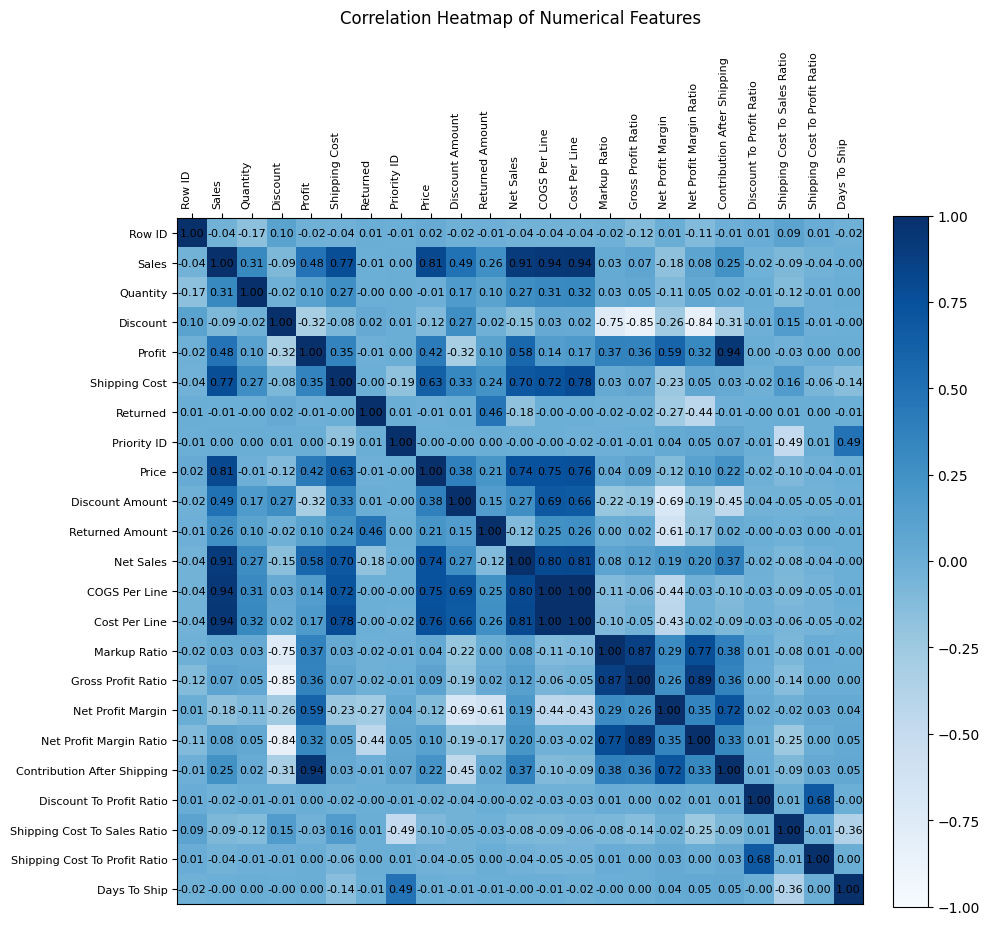

In [25]:
# Calculate correlation matrix
# num_cols = ['Row ID', 'Sales', 'Quantity', 'Discount', 'Profit', 'Shipping Cost']
num_cols = df.select_dtypes(include=['number']).columns.tolist()
corr = df[num_cols].corr()

# Plot heatmap with annotations and blues colormap
fig, ax = plt.subplots(figsize=(10, 12))
cax = ax.imshow(corr, cmap='Blues', vmin=-1, vmax=1)

# Set ticks and labels
ax.set_xticks(np.arange(len(num_cols)))
ax.set_yticks(np.arange(len(num_cols)))
ax.set_xticklabels(num_cols, rotation=90, ha='right', fontsize=8)
ax.xaxis.tick_top()
ax.set_yticklabels(num_cols, fontsize=8)

# Annotate correlation values
for i in range(len(num_cols)):
    for j in range(len(num_cols)):
        ax.text(j, i, f"{corr.iloc[i, j]:.2f}", ha='center', va='center', color='black', fontsize=8)

# Add colorbar
fig.colorbar(cax, ax=ax, fraction=0.046, pad=0.04)
plt.title('Correlation Heatmap of Numerical Features', pad=20)
plt.tight_layout()

Correlation patterns:
* Sales and Profit show a strong positive correlation
* Discount negatively correlates with Profit
* Shipping Cost correlates positively with Sales (since larger orders cost more to ship)

## Univariate analysis

### Histograms

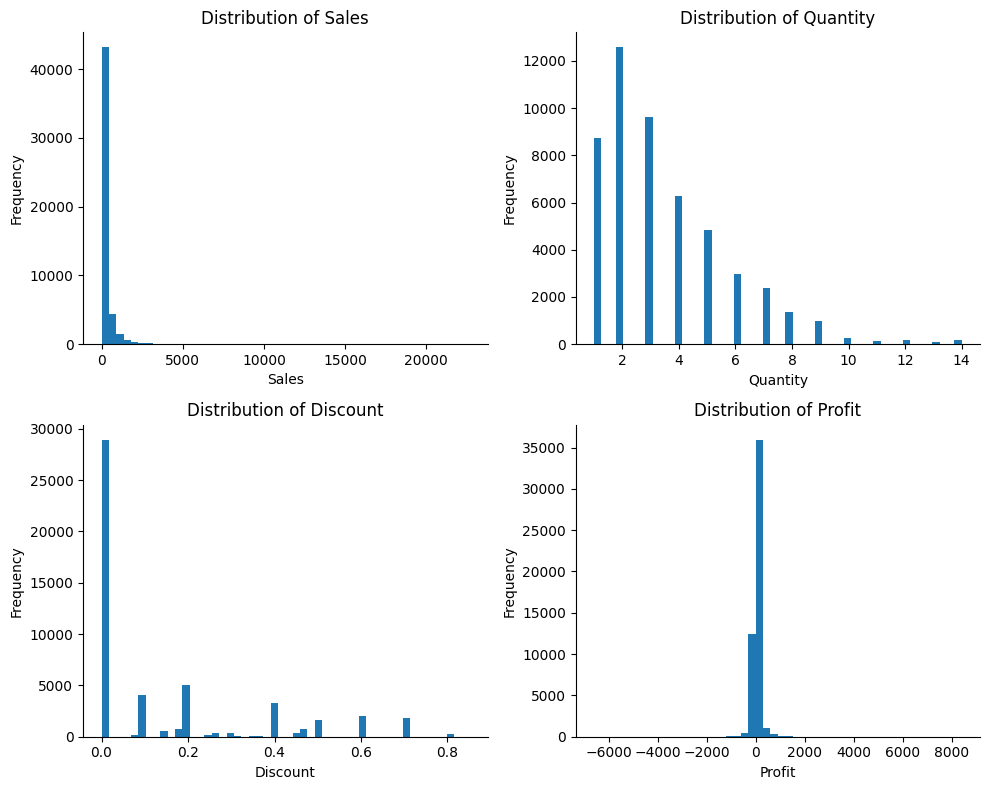

In [26]:
# Select numerical columns
numerical_cols = ['Sales', 'Quantity', 'Discount', 'Profit']

# Create histograms for each numerical column
# figs = []
fig, axs = plt.subplots(2, 2, figsize=(10, 8))
# fig, axs = plt.subplots(4, 4, figsize=(15, 9))

for ax, col in zip(axs.flat, numerical_cols):
    # fig, ax = plt.subplots()
    ax.hist(df[col], bins=50)
    ax.set_title(f'Distribution of {col}')
    ax.set_xlabel(col, fontsize=10)
    ax.set_ylabel('Frequency', fontsize=10)
    ax.tick_params(axis='both', labelsize=10)
    sns.despine()   # Remove top, right axes
    # figs.append(fig)

# Remove any leftover axes
for ax in axs.flat[len(numerical_cols):]:
    fig.delaxes(ax)   # or ax.set_visible(False)

plt.tight_layout()
# figs


#### Distribution plots insights:
* Sales exhibit heavy right skew. Most orders are low-value, with a small number of very large orders driving a long tail
* Discount has a spike close at 0% and another around common discount rates (10%, 20%, 40%)
* Quantity clusters at small integers (1–3), decreasing rapidly

### Boxplots

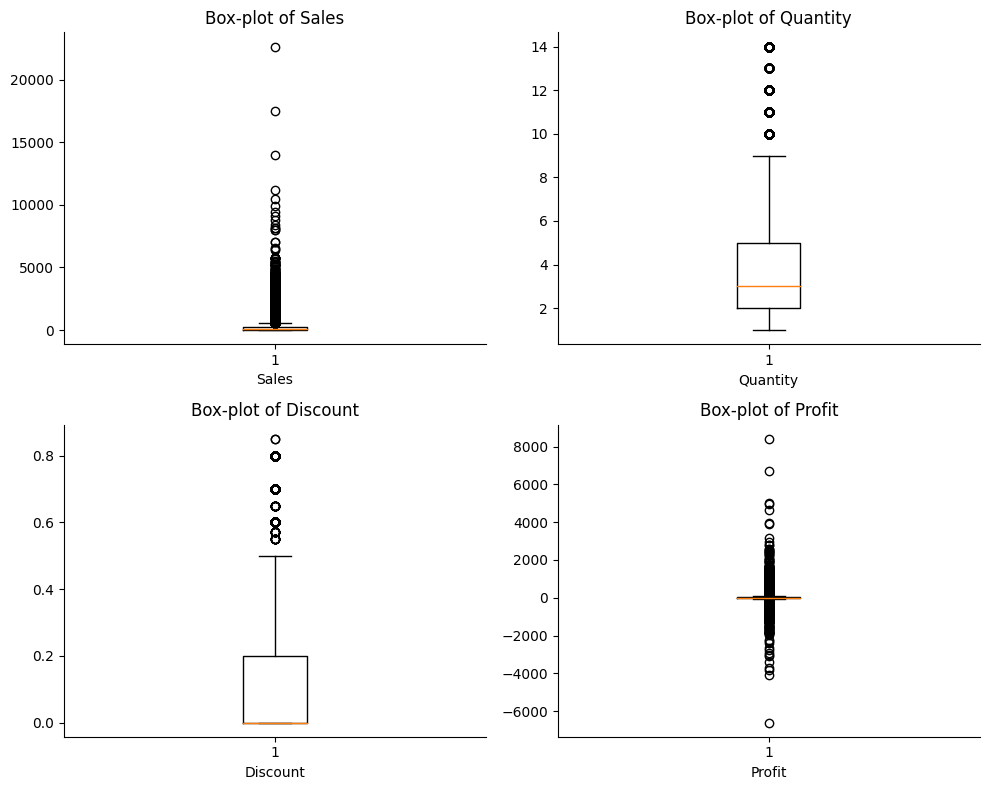

In [27]:
# Create box-plot for each numerical column
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

for ax, col in zip(axs.flat, numerical_cols):
    ax.boxplot(df[col])
    ax.set_title(f'Box-plot of {col}')
    ax.set_xlabel(col, fontsize=10)
    ax.tick_params(axis='both', labelsize=10)
    sns.despine()   # Remove top, right axes

# Remove any leftover axes
for ax in axs.flat[len(numerical_cols):]:
    fig.delaxes(ax)   # or ax.set_visible(False)

plt.tight_layout()

#### Boxplots insights:
* Profit shows several negative outliers - orders sold at a loss

### Bar plots

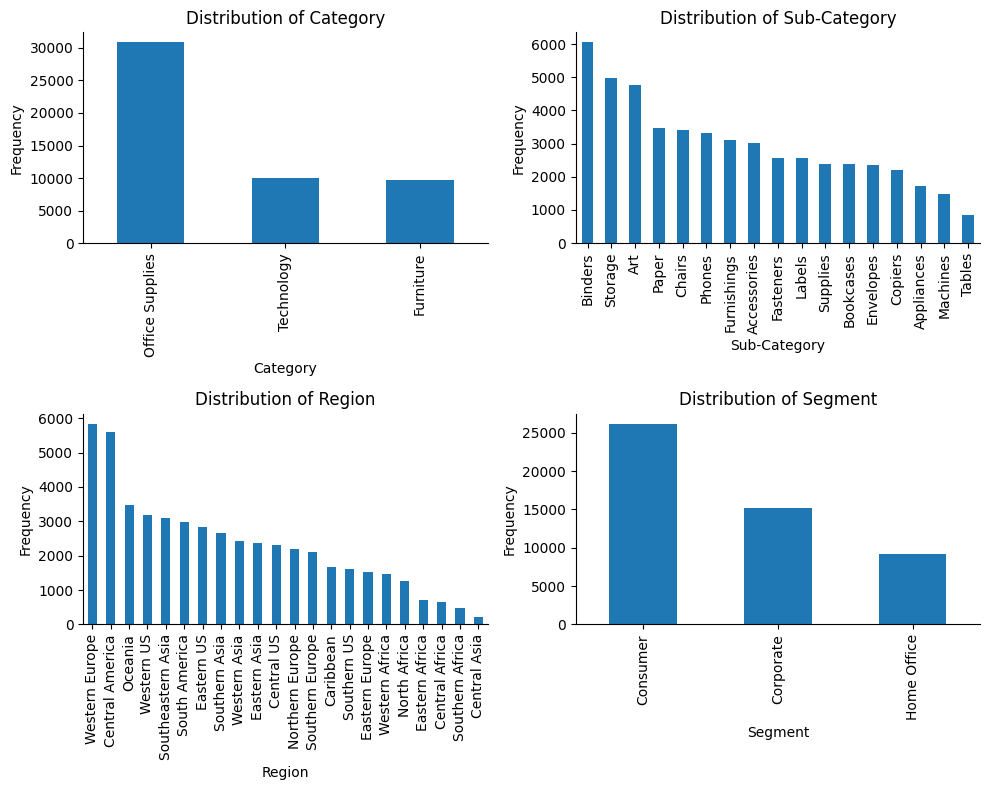

In [28]:
# Select categorical columns
categorical_cols = ['Category', 'Sub-Category', 'Region', 'Segment']

fig, axs = plt.subplots(2, 2, figsize=(10, 8))

for ax, col in zip(axs.flat, categorical_cols):
    # fig, ax = plt.subplots()
    df[col].value_counts().plot(kind='bar', ax=ax)
    ax.set_title(f'Distribution of {col}')
    ax.set_xlabel(col, fontsize=10)
    ax.set_ylabel('Frequency', fontsize=10)
    ax.tick_params(axis='both', labelsize=10)
    sns.despine()   # Remove top, right axes

# Remove any leftover axes
for ax in axs.flat[len(numerical_cols):]:
    fig.delaxes(ax)   # or ax.set_visible(False)

plt.tight_layout()

#### Bar plots insights:
* Office Supplies gather the vast amount of transactions with Binders, Storage and Art products being at the top
* Western Europe and Central America dominate in transaction count, followed by Oceania and Western US
* Consumer segment is dominating the market while Home Office is at the last place

## Bivariate analysis

### Scatter plots

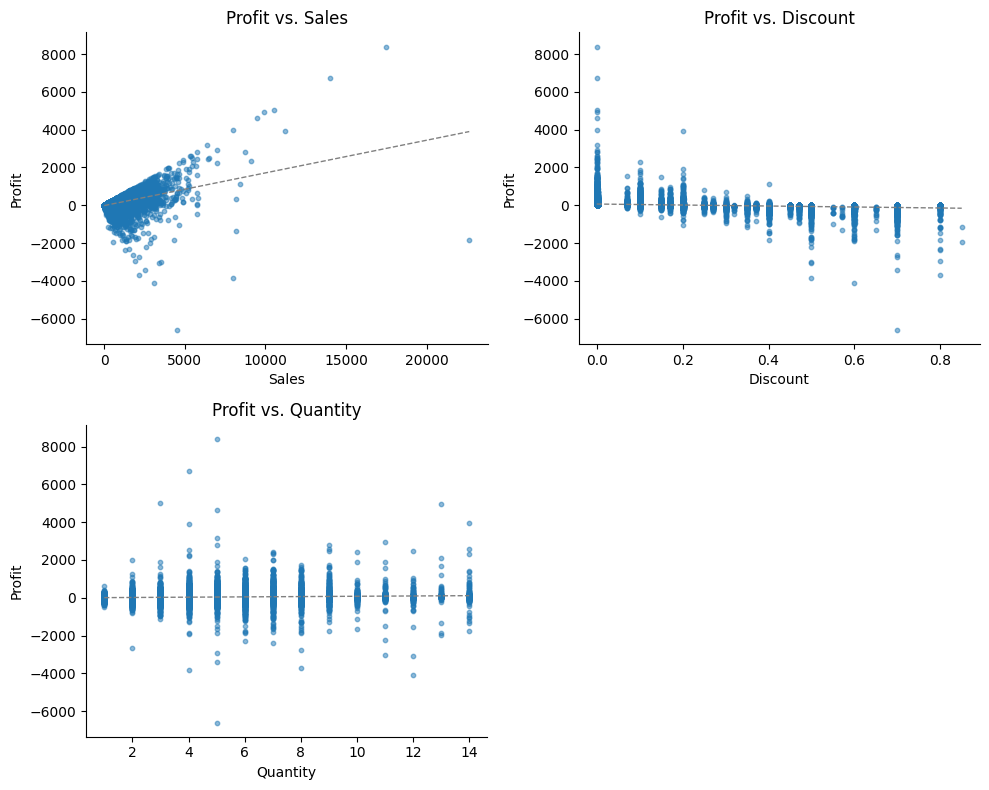

In [29]:
# Define pairs
pairs = [('Sales', 'Profit'), ('Discount', 'Profit'), ('Quantity', 'Profit')]

# Create scatter plots
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Flatten axes for easy iteration
axs_flat = axs.flatten()

# Plot each pair
for idx, (x, y) in enumerate(pairs):
    axs_flat[idx].scatter(df[x], df[y], s=10, alpha=0.5)

    # Draw a trendline
    mask = ~df[x].isna() & ~df[y].isna()
    coeffs = np.polyfit(df[x][mask], df[y][mask], deg=1)
    trend = np.poly1d(coeffs)
    x_line = np.linspace(df[x].min(), df[x].max(), 100)
    axs_flat[idx].plot(x_line, trend(x_line), linewidth=1, linestyle='--', color='grey')

    axs_flat[idx].set_xlabel(x, fontsize=10)
    axs_flat[idx].set_ylabel(y, fontsize=10)
    axs_flat[idx].set_title(f'{y} vs. {x}')
    axs_flat[idx].tick_params(axis='both', labelsize=10)
    sns.despine()   # Remove top, right axes


# Remove any leftover axes
for ax in axs.flat[len(pairs):]:
    fig.delaxes(ax)   # or ax.set_visible(False)

plt.tight_layout()

#### Scatter plots insights:
* Profit vs. Sales shows a strong positive trend with increasing variance at higher sales
* Profit vs. Discount shows a negative impact of discount due to downward slope of the trendline
* Profit vs. Quantity shows no clear trend but some high-quantity, high-profit outliers

### Quadrant plot

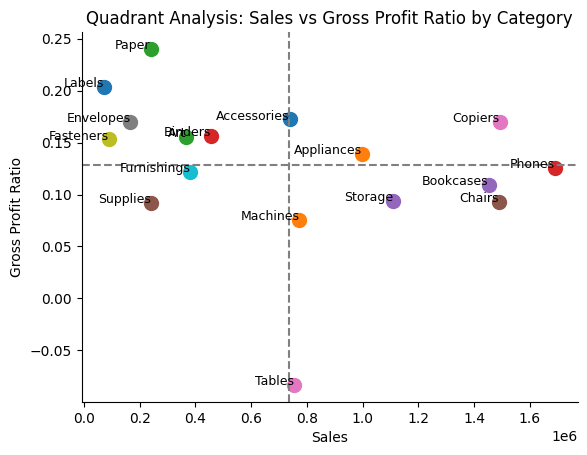

In [30]:
# Prepare quadrant analysis data: Revenue vs Gross Profit Ratio by Sub-Category
quadrant_data = df.groupby('Sub-Category').agg({
    'Sales': 'sum',
    'Profit': 'sum'
})
quadrant_data['Gross Profit Ratio'] = (quadrant_data['Profit'] / quadrant_data['Sales'])

# Calculate means to define quadrants
avg_revenue = quadrant_data['Sales'].mean()
avg_margin = quadrant_data['Gross Profit Ratio'].mean()

# Plot quadrant chart
for idx, row in quadrant_data.iterrows():
    plt.scatter(row['Sales'], row['Gross Profit Ratio'], s=100)
    plt.text(row['Sales'], row['Gross Profit Ratio'], idx, fontsize=9, ha='right')

# Draw average lines to create quadrants
plt.axhline(avg_margin, color='gray', linestyle='--')
plt.axvline(avg_revenue, color='gray', linestyle='--')

plt.title('Quadrant Analysis: Sales vs Gross Profit Ratio by Category')
plt.xlabel('Sales')
plt.ylabel('Gross Profit Ratio')
sns.despine()
plt.show()

#### Quadrant plot insights:
* While Appliances and Copiers are positioned highly (top-right quadrant, high Sales with high Profits) of Sales vs Gross Profit Ratio, Supplies and Furnishings are at the bottom-left quadrant with low Sales and low Profit

# The End